# Buscando identificar forma de sino numa função

In [6]:
import numpy as np
import seaborn as sns

from zipfile import ZipFile
from matplotlib import pyplot as plt
from skimage.io import imread

from img_edit import auto_rotate_and_crop, best_rgb, rgb_to_color

sns.set_style(style='darkgrid')
plt.gray()

color_dict = {i:s for i, s in enumerate(['vermelho', 'verde', 'azul'])}

<Figure size 432x288 with 0 Axes>

In [7]:
path_list = []
with ZipFile('./toras.zip') as zip_file:
  for path in zip_file.namelist():
    if '__MAC' not in path \
        and '.JPG' in path:
      path_list.append(f'./toras.zip/{path}')

## Plotando somas horizontais e histogramas normalizados de RGB sem rotação

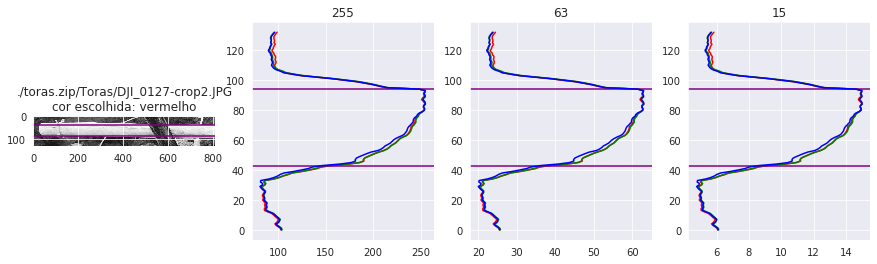

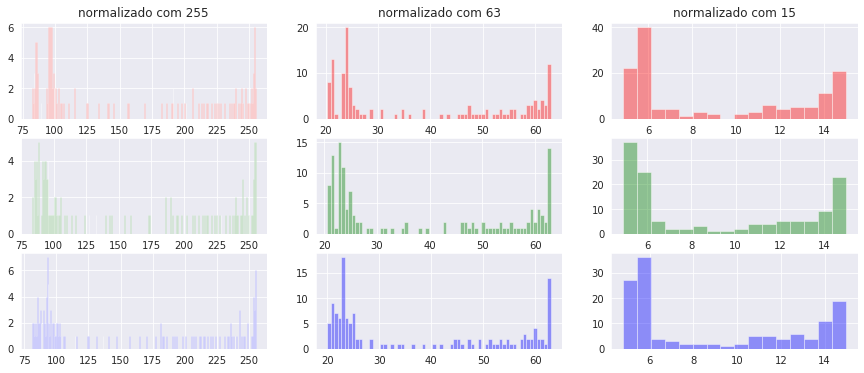

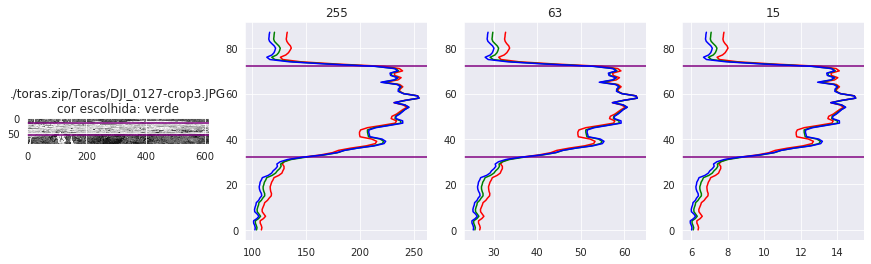

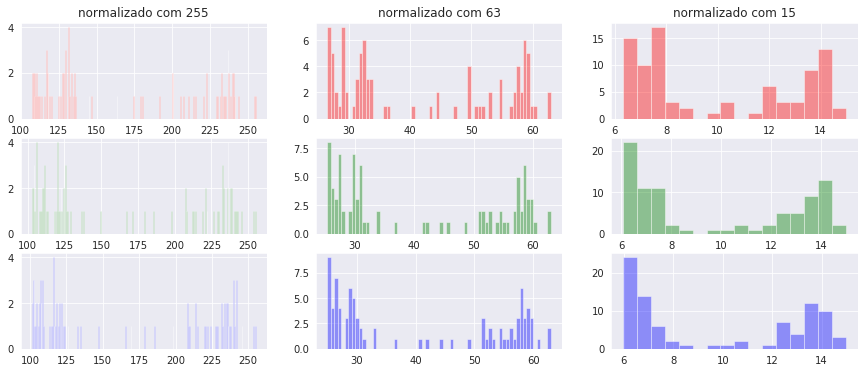

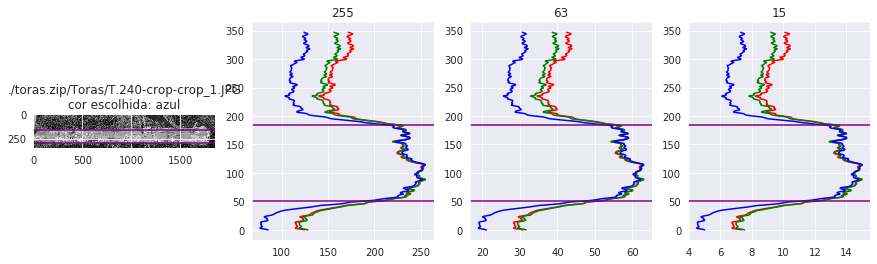

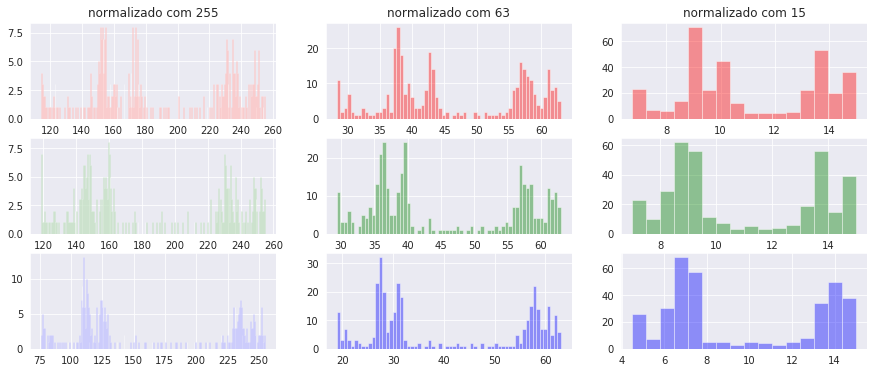

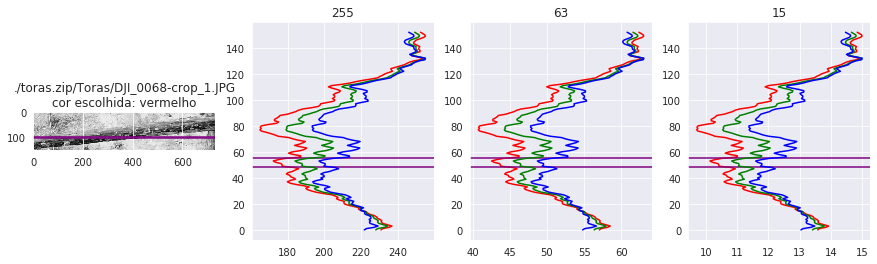

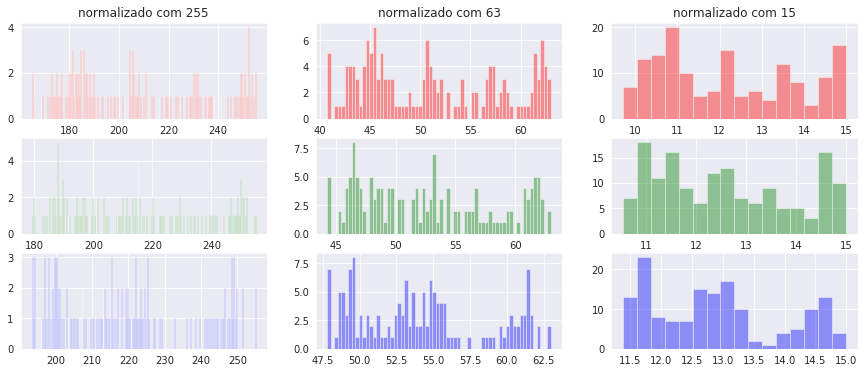

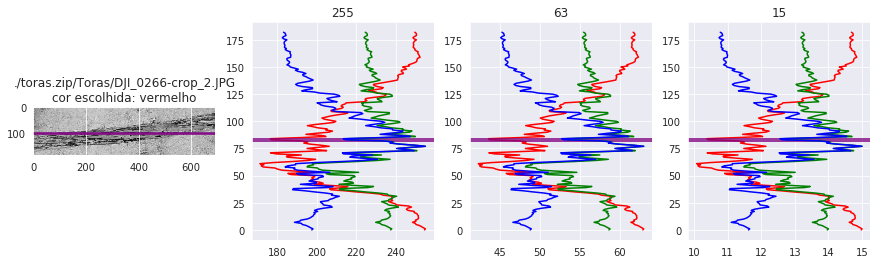

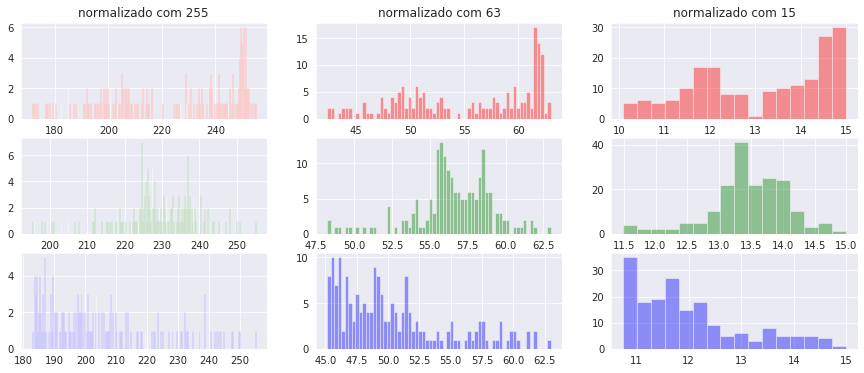

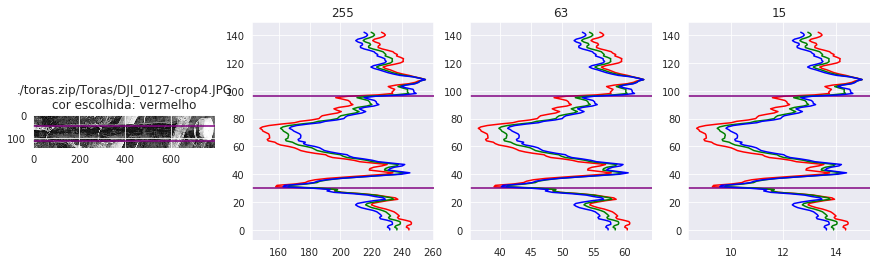

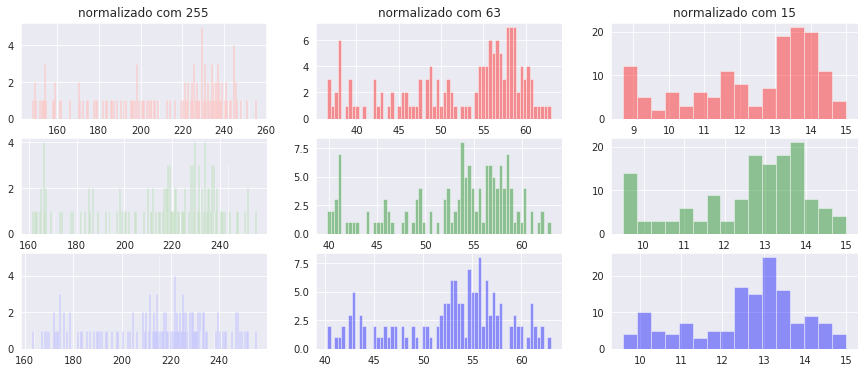

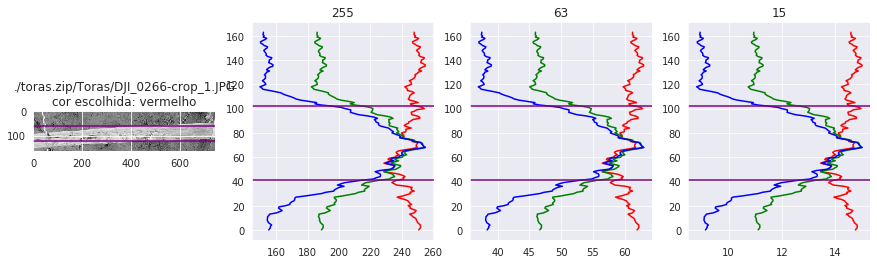

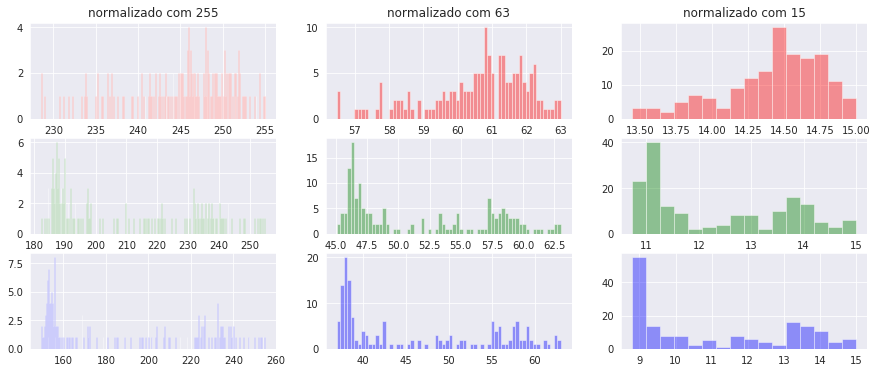

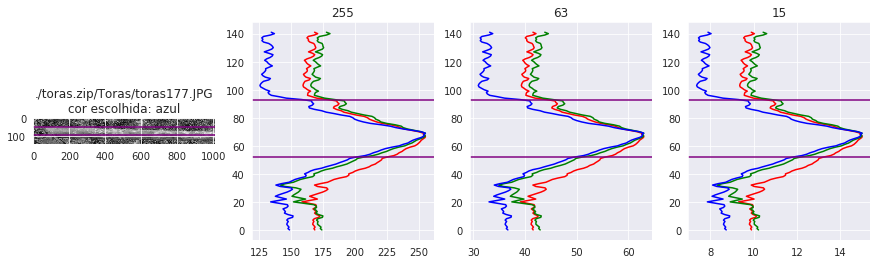

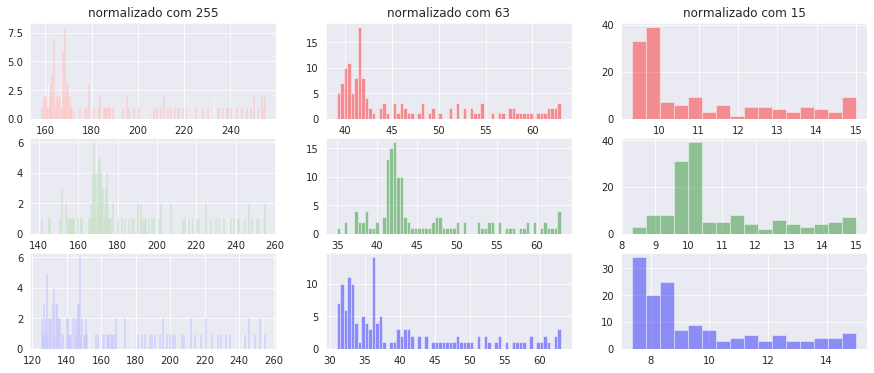

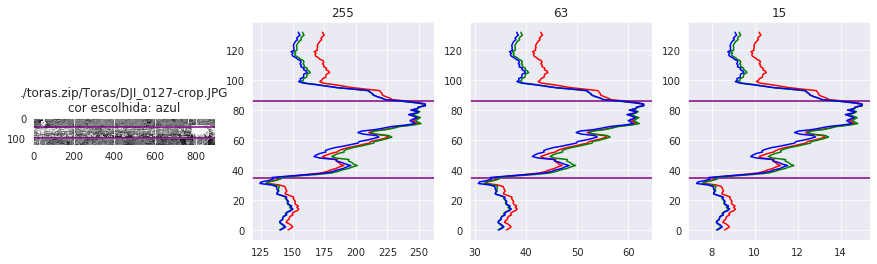

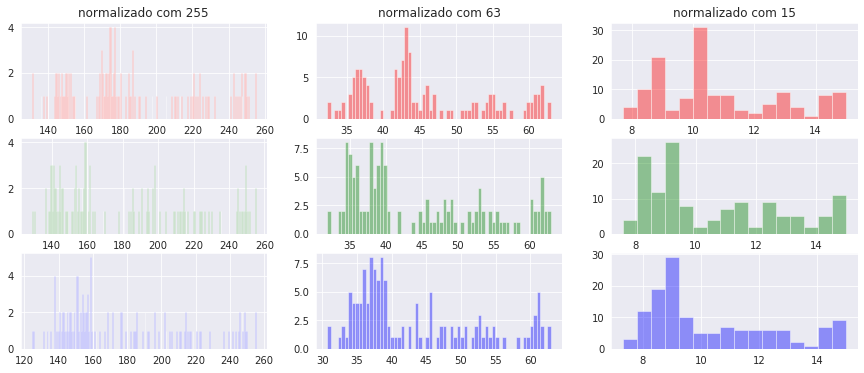

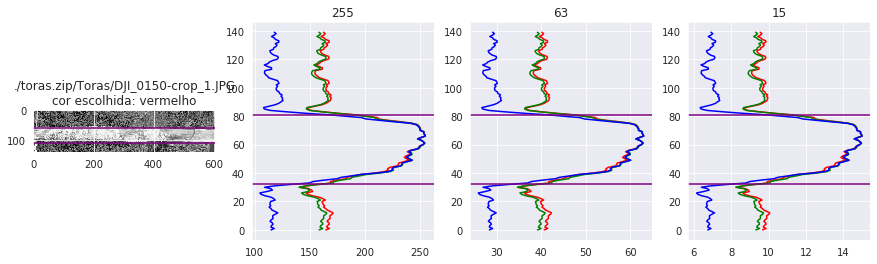

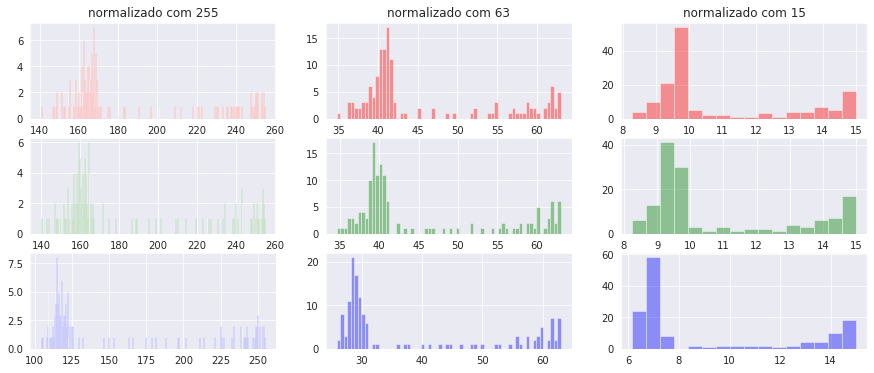

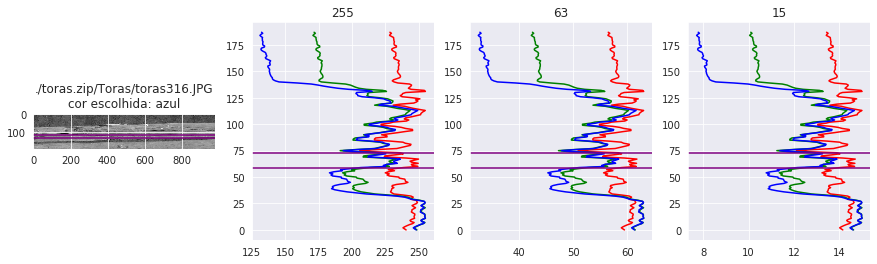

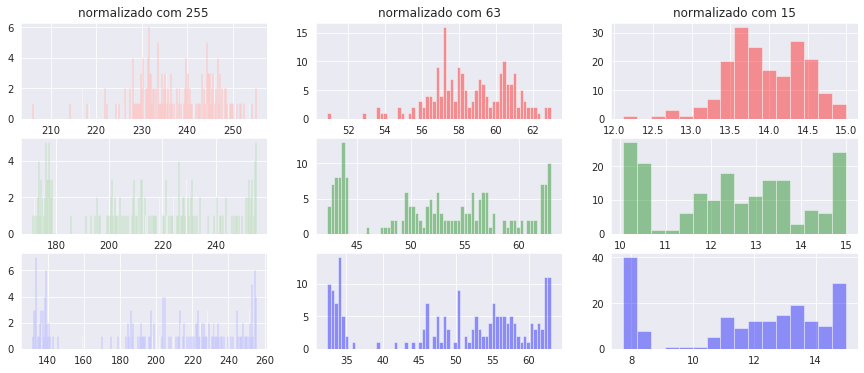

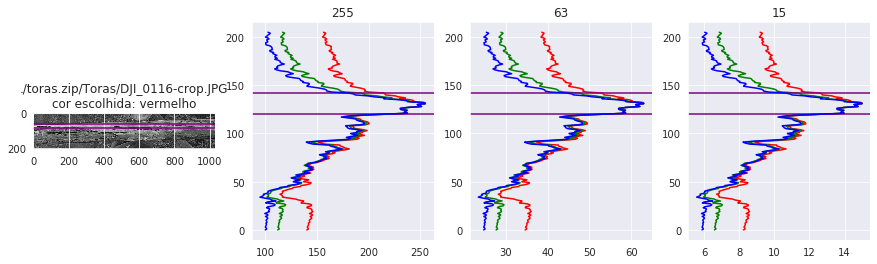

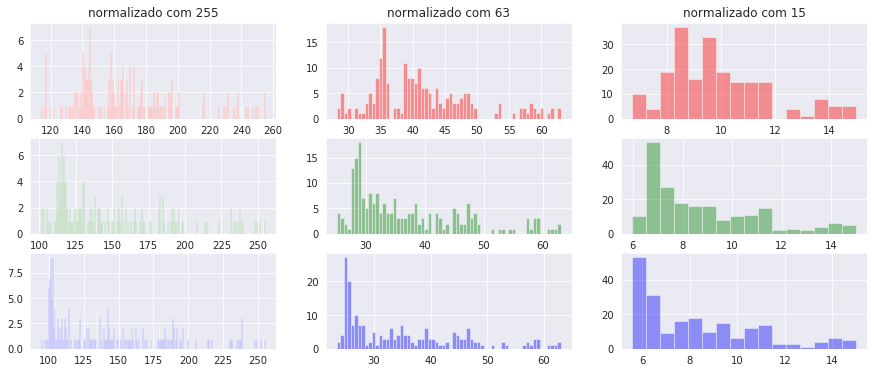

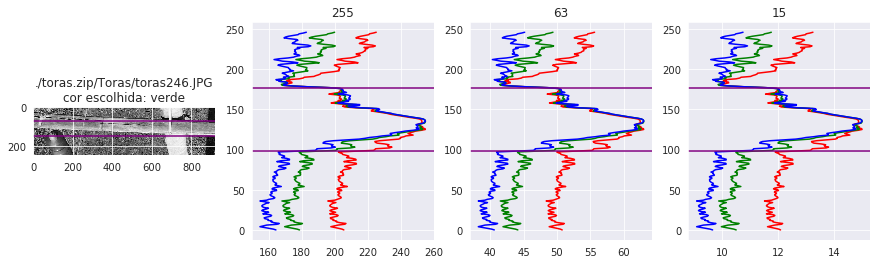

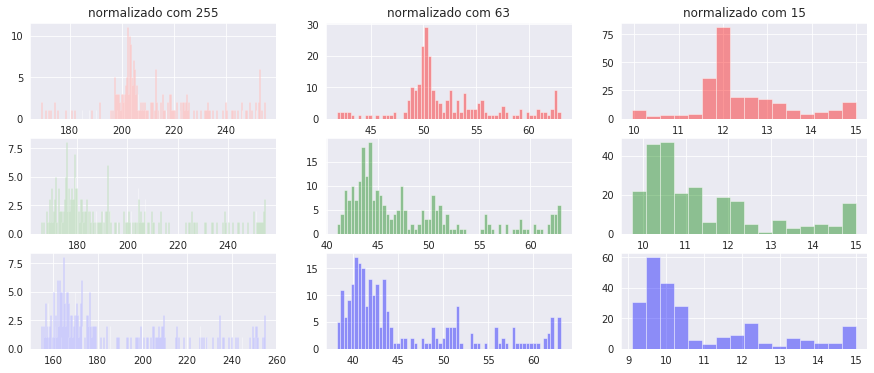

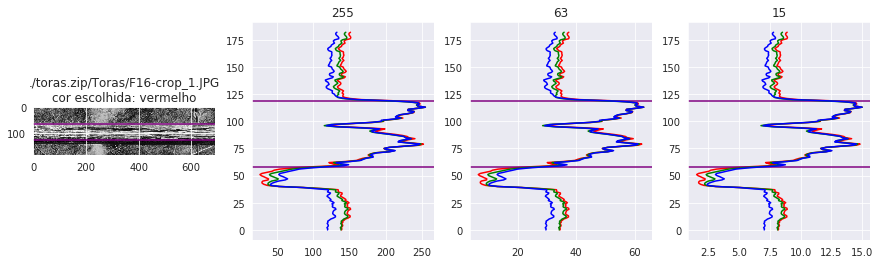

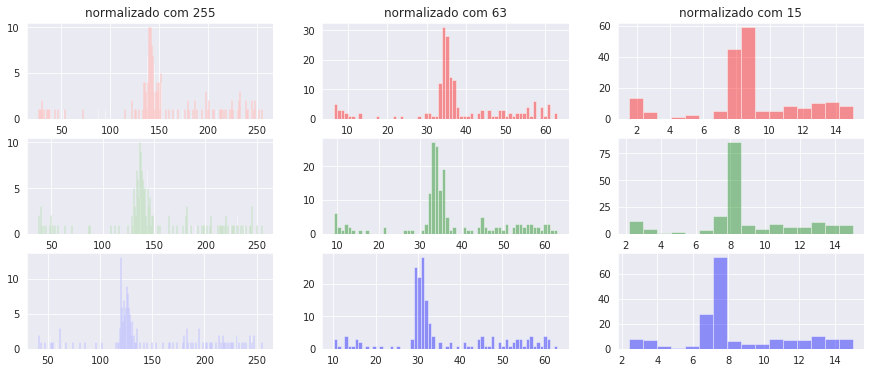

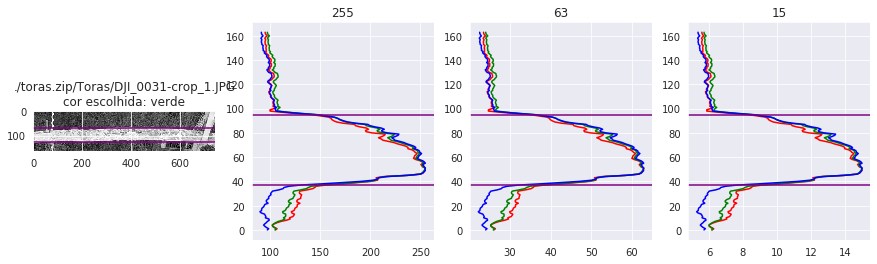

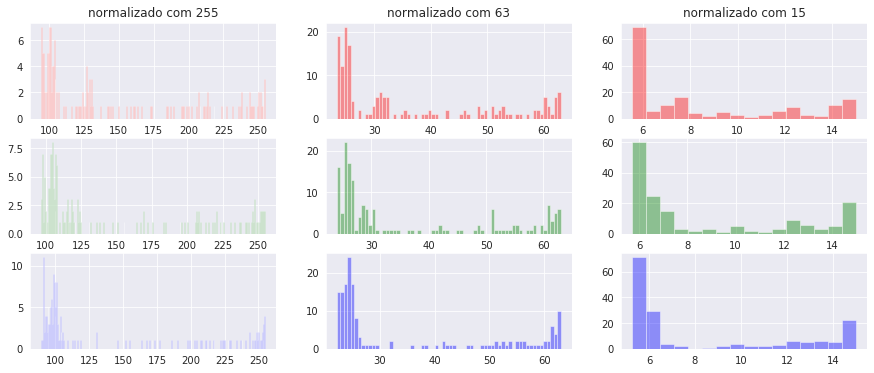

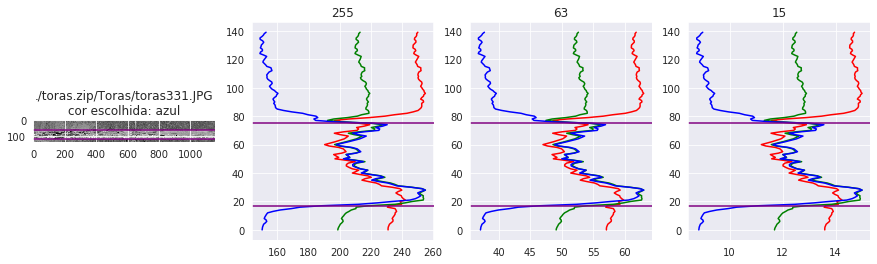

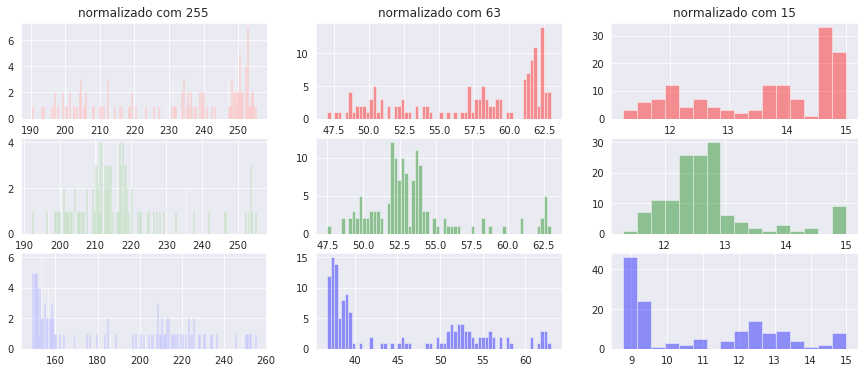

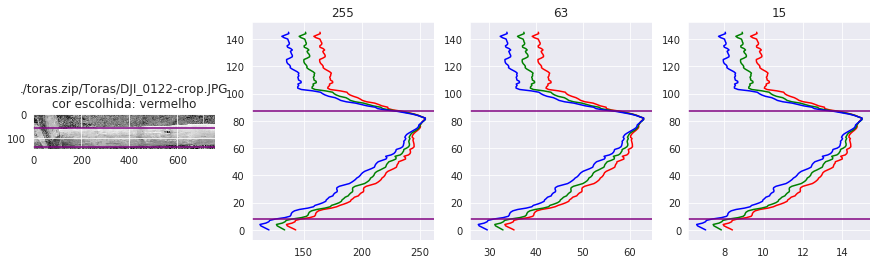

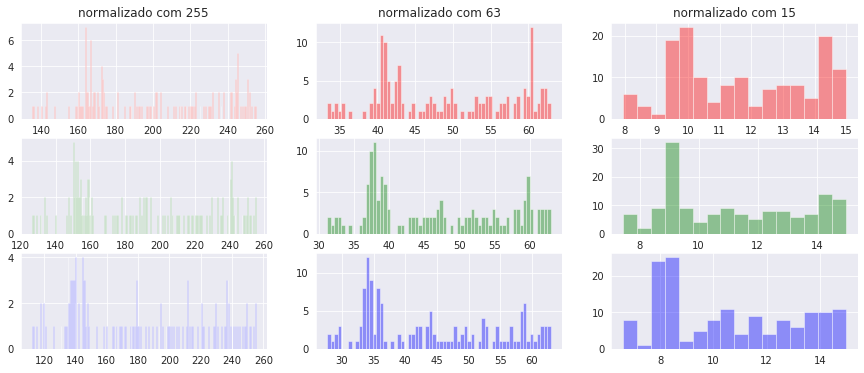

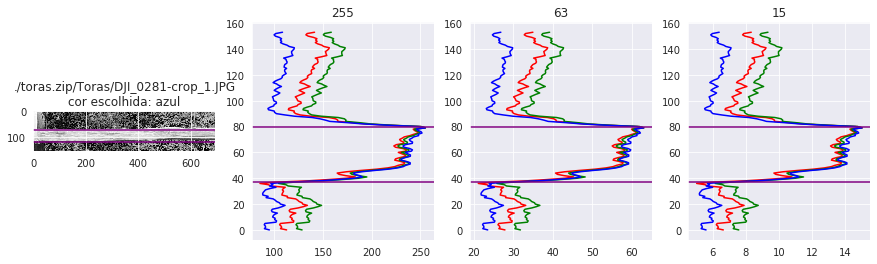

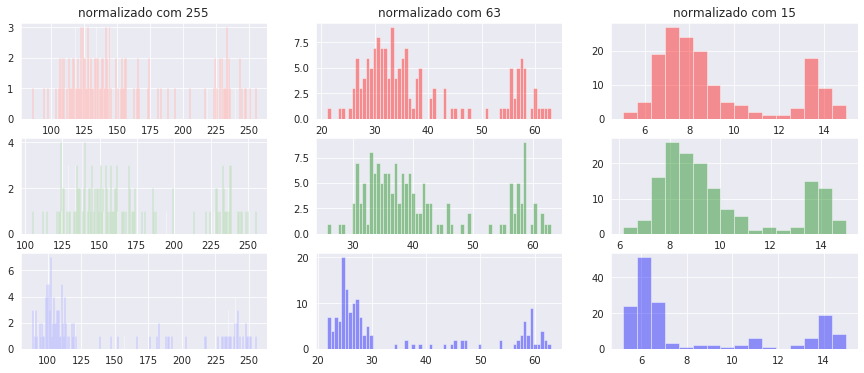

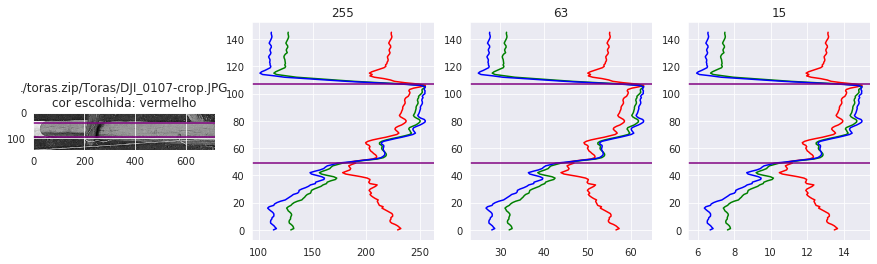

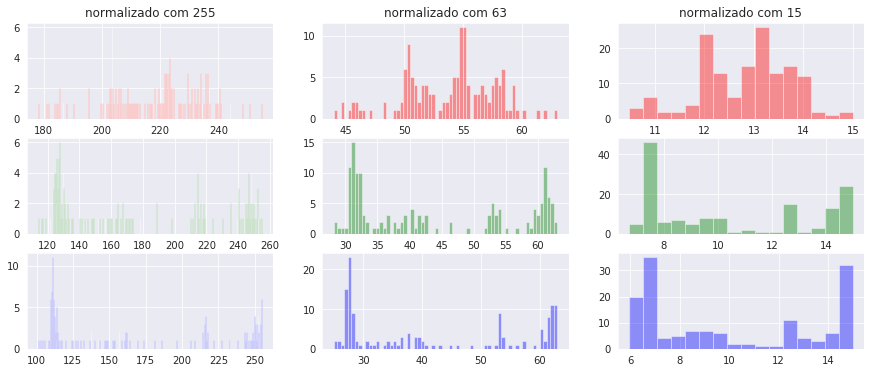

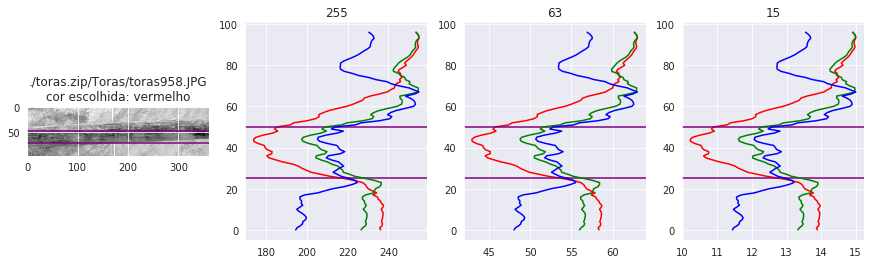

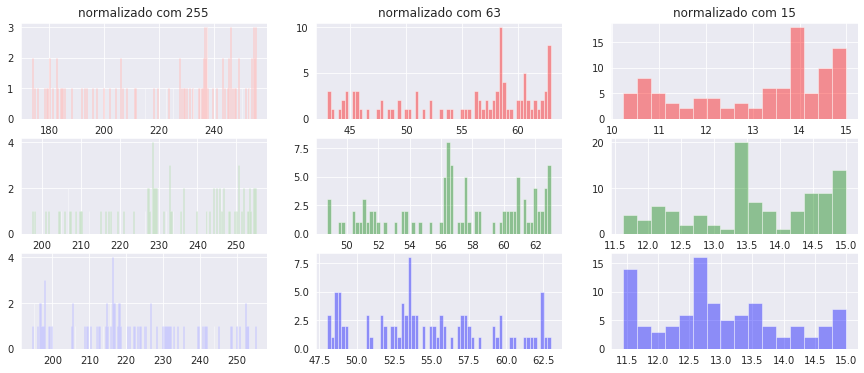

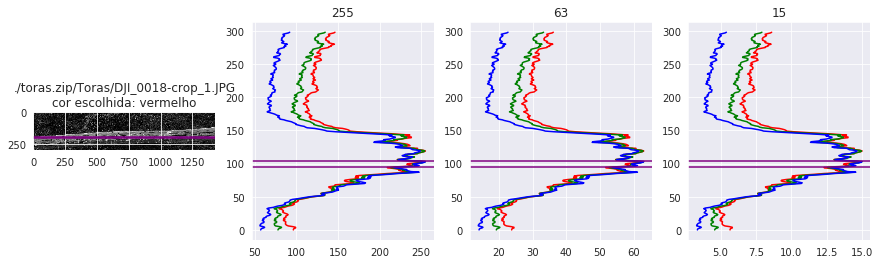

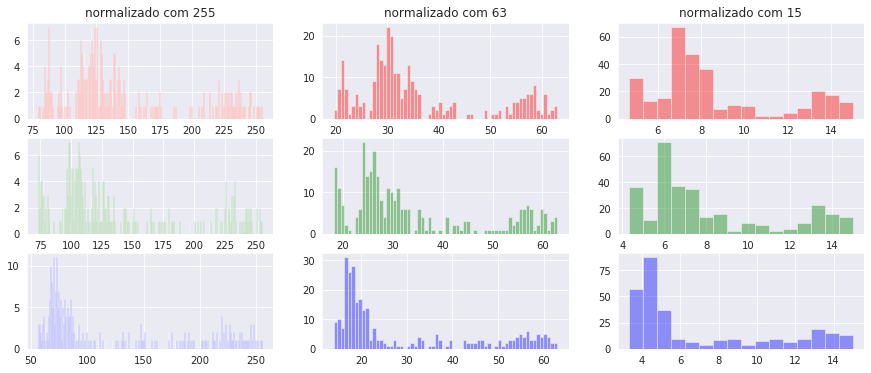

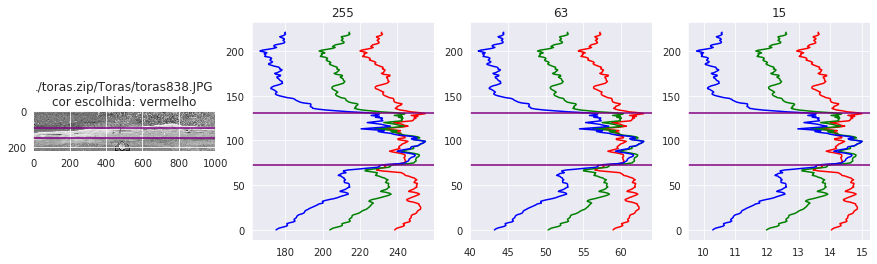

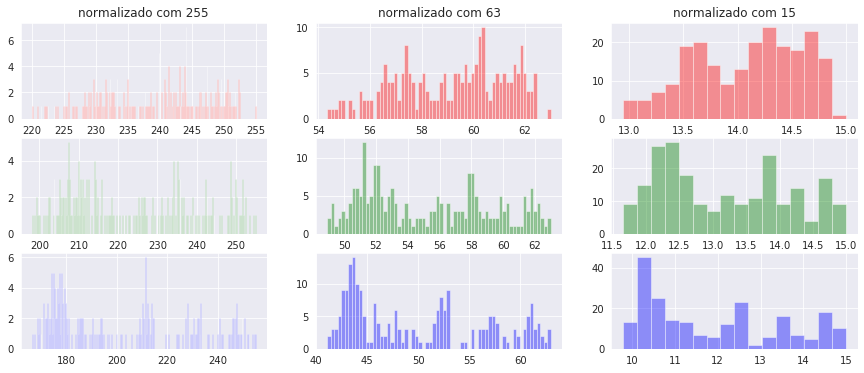

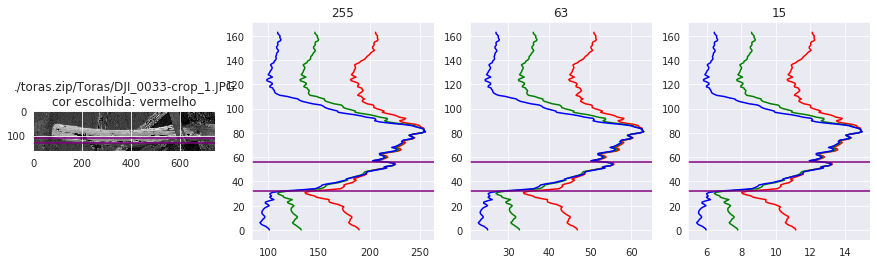

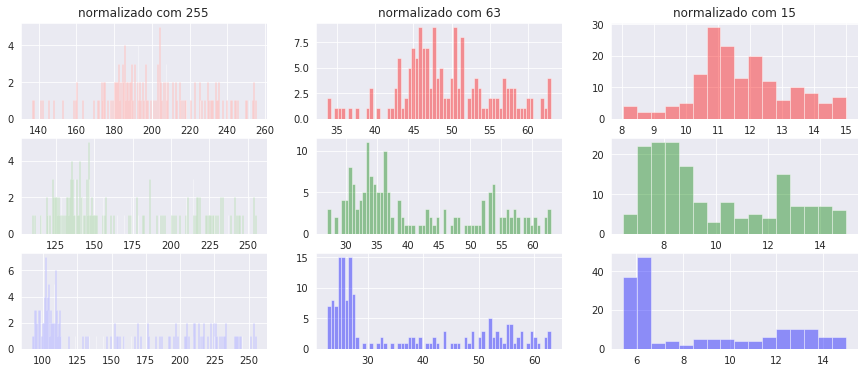

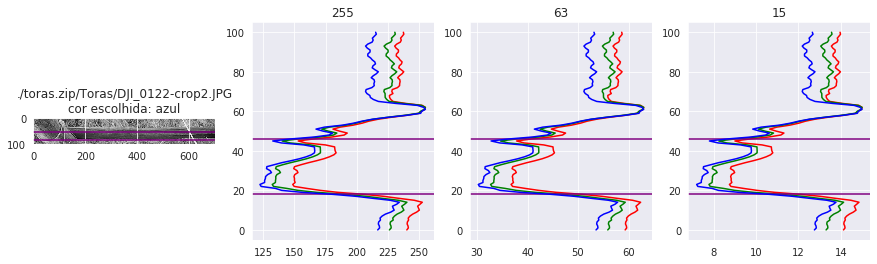

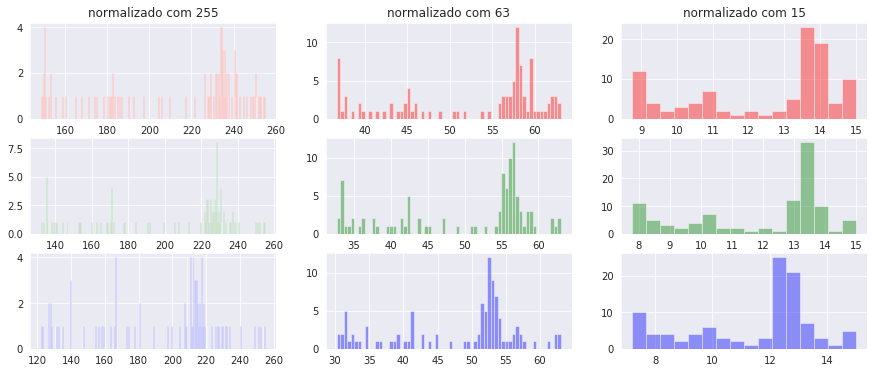

In [8]:
for path in path_list:
  # lendo imagem RGB
  img = imread(path)

  # Escolhendo qual cor apresenta maior variação
  cor_v, cor_h = best_rgb(img)

  # Plotando imagens
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
  
  # Plotando histogramas
  fig2, ax_hist = plt.subplots(nrows=3, ncols=3, figsize=(15, 6))

  # somas verticais e horizontais
  for i, cor in enumerate(['r-', 'g-', 'b-']):
    new_img = rgb_to_color(img, i)
    h, w = new_img.shape

    soma_horizontal = new_img.sum(axis=1)
    for k, norm in enumerate([255, 63, 15]):
      soma_normalizada = soma_horizontal * norm/soma_horizontal.max()
      ax[1+k].plot(soma_normalizada, range(h-1, -1, -1), cor)
      ax[1+k].title.set_text(f'{norm}')
      # Plotando histogramas
      ax_hist[0, k].title.set_text(f'normalizado com {norm}')
      sns.distplot(
        a=soma_normalizada,
        bins=norm+1,
        kde=False,
        ax=ax_hist[i, k],
        color=cor[:-1])

    # exibindo apenas a de maior variação horizontal
    if i == cor_h:
      ax[0].title.set_text(f'{path}\ncor escolhida: {color_dict[cor_v]}')
      ax[0].imshow(new_img)

      diff_h = np.diff(soma_horizontal)
      maximo = max(diff_h)
      minimo = min(diff_h)
      for j, e in enumerate(diff_h[::-1]):
        if e == maximo or e == minimo:
          ax[3].axhline(j, color='purple')
          ax[2].axhline(j, color='purple')
          ax[1].axhline(j, color='purple')
          ax[0].axhline(h - j, color='purple')


  plt.show()
